In [21]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use('ggplot')
# experiment_list = ['VGG_38_bn','VGG_38_experiment','VGG_08','VGG_38_dense4f32gr']

### 配置需要修改↓

In [22]:
# linux文件目录分割使用/; windows使用\
is_linux=False

In [23]:
def collect_experiment_dicts(target_dirs, test_flag=False):
    experiment_dicts = dict()
    for target_dir in target_dirs: 
        for subdir, dir, files in os.walk(target_dir):
            for file in files:
                filepath = None
                if not test_flag:
                    if file == 'summary.csv':
                        filepath = os.path.join(subdir, file)

                elif test_flag:
                    if file == 'test_summary.csv':
                        filepath = os.path.join(subdir, file)

                if filepath is not None:
#                     print(filepath)
                    with open(filepath, 'r') as read_file:
                        lines = read_file.readlines()

                    current_experiment_dict = {key: [] for key in lines[0].replace('\n', '').split(',')}
                    idx_to_key = {idx: key for idx, key in enumerate(lines[0].replace('\n', '').split(','))}

                    for line in lines[1:]:
                        for idx, value in enumerate(line.replace('\n', '').split(',')):
                            if(len(value.strip())):
                                current_experiment_dict[idx_to_key[idx]].append(float(value))
                    #windows only 
                    if(is_linux):
                        experiment_dicts[subdir.split('/')[-2]] = current_experiment_dict
                    else:
                        experiment_dicts[subdir.split('\\')[0].split('/')[-1]] = current_experiment_dict
                    
                    #for linu
                    print(subdir)
                
    return experiment_dicts
                
            

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def plot_result_graphs(plot_name, stats, keys_to_plot, display_metrics,title, display_epoch=-1, notebook=True, is_loss=True):
    
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    
    if(is_loss):
        for name in keys_to_plot:
            for k in display_metrics:
                item = stats[name][k]
                if(display_epoch == -1):
                    ax_1.plot(np.arange(0, len(item)), 
                              item, label='{}_{}'.format(name, k))
                else:
                    ax_1.plot(np.arange(0, display_epoch), 
                              item[0:display_epoch], label='{}_{}'.format(name, k))

        ax_1.legend(loc=0)
        ax_1.set_ylabel('Loss')
        ax_1.set_xlabel('Epoch number')
        ax_1.set_title(title)
        fig_1.savefig('./fig/{}_loss_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
        
    else:
        # Plot the change in the validation and training set accuracy over training.
        fig_2 = plt.figure(figsize=(8, 4))
        ax_2 = fig_2.add_subplot(111)
        for name in keys_to_plot:
            for k in display_metrics:
                item = stats[name][k]
                if(display_epoch == -1):
                    ax_2.plot(np.arange(0, len(item)), 
                              item, label='{}_{}'.format(name, k))
                else:
                     ax_2.plot(np.arange(0, display_epoch), 
                              item[0:display_epoch], label='{}_{}'.format(name, k))\


        ax_2.legend(loc=0)
        ax_2.set_ylabel('Accuracy')
        ax_2.set_xlabel('Epoch number')
        ax_2.set_title(title)


        fig_2.savefig('./fig/{}_accuracy_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='pdf',
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)
    
    

### 配置需要修改↓

D:\Progarm\anaconda\envs\py37_pytorch_cuda10\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


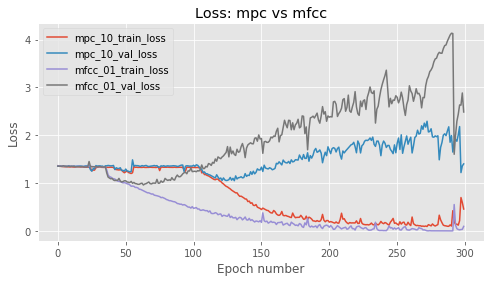

In [26]:
experiment_list = ['mpc_10','mfcc_01']#实验的文件夹名
metrics = ['train_loss', 'val_loss']#需要画的数据,不要把acc和loss放到一起
fig_title = 'Loss: mpc vs mfcc'
experiment_dir = ['../framework/' + exper_name for exper_name in experiment_list]#不用管

# plot_name作为图片储存的文件名  {plot_name}_accuracy_performance.pdf 或者 plot_name}_loss_performance.pdf
plot_result_graphs(plot_name = 'problem_model', result_dict, experiment_list, metrics, title = fig_title, display_epoch=300, is_loss=True) #如果是loss就会



### 画的图片将储存到 mlp_groupcw/notebooks/fig